         Date     Open    High     Low   Close  Volume
0  29-Mar-2019  102.90  106.65  102.00  103.25  306346
1  28-Mar-2019  102.30  103.35  101.50  102.10  154762
2  27-Mar-2019  102.45  103.80  101.05  102.00  174526
3  26-Mar-2019  103.35  103.35  101.00  102.45  107275
4  25-Mar-2019  102.10  104.90  101.70  102.55   88687

****
             Date    Open    High    Low   Close  Volume
2379  26-Aug-2009  415.0  435.00  411.0  413.60  327763
2380  25-Aug-2009  428.2  459.40  411.0  416.50  578527
2381  24-Aug-2009  388.7  423.95  379.0  418.55  484950
2382  21-Aug-2009  364.1  397.70  364.0  381.85  148815
2383  20-Aug-2009  379.0  384.00  370.0  370.30   58880
_________________________________________________________

OPEN 
	Average :  201.38632550335583 
	Maximum :  448.0 
	Minimum :  96.35 
	Standard Deviation :  85.82177583889988


HIGH 
	Average :  205.28166946308815 
	Maximum :  462.4 
	Minimum :  97.9 
	Standard Deviation :  87.23263018903023


LOW 
	Average :  197.3686451342

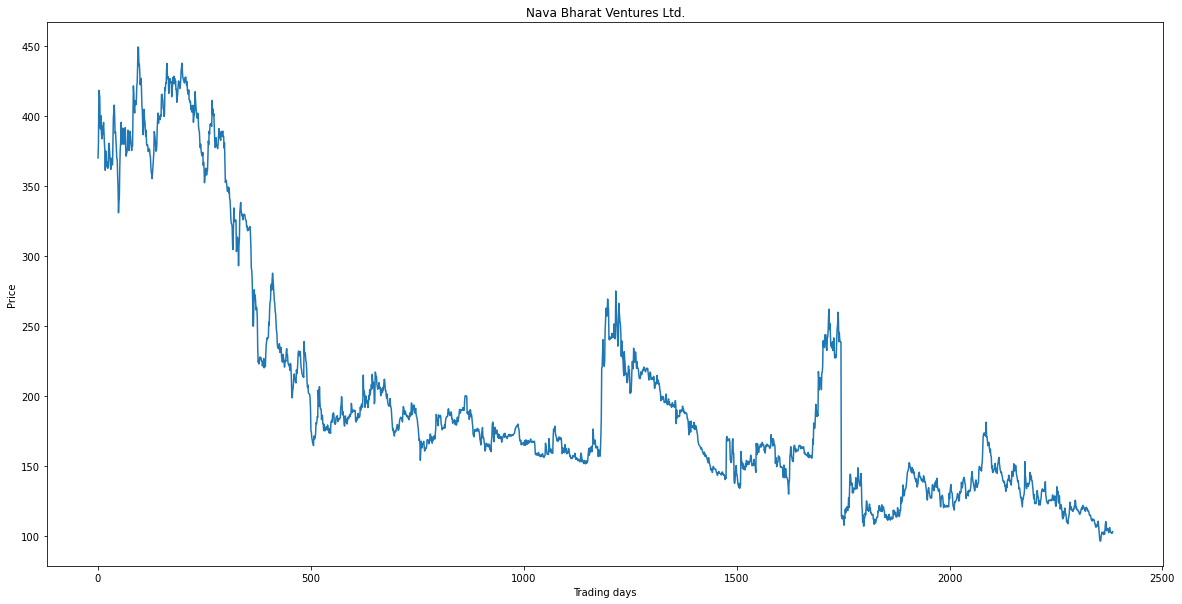

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("/home/shravan/Desktop/Datasets/power/nbv/nbv.xlsx")

print(df.head())
print("\n****\n",df.tail())

print("_________________________________________________________\n\nOPEN \n\tAverage : ",np.mean(df.loc[:]['Open']),"\n\tMaximum : ", np.max(df['Open']),"\n\tMinimum : ", np.min(df['Open']),"\n\tStandard Deviation : ", np.std(df['Open']))
print("\n\nHIGH \n\tAverage : ",np.mean(df.loc[:]['High']),"\n\tMaximum : ", np.max(df['High']),"\n\tMinimum : ", np.min(df['High']),"\n\tStandard Deviation : ", np.std(df['High']))
print("\n\nLOW \n\tAverage : ",np.mean(df.loc[:]['Low']),"\n\tMaximum : ", np.max(df['Low']),"\n\tMinimum : ", np.min(df['Low']),"\n\tStandard Deviation : ", np.std(df['Low']))
print("\n\nCLOSE \n\tAverage : ",np.mean(df.loc[:]['Close']),"\n\tMaximum : ", np.max(df['Close']),"\n\tMinimum : ", np.min(df['Close']),"\n\tStandard Deviation : ", np.std(df['Close']))
print("\n\nVOLUME \n\tAverage : ",np.mean(df.loc[:]['Volume']),"\n\tMaximum : ", np.max(df['Volume']),"\n\tMinimum : ", np.min(df['Volume']),"\n\tStandard Deviation : ", np.std(df['Volume']))

def reverse_data(df):
    date = []
    day = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    for i in range(len(df)-1, -1, -1):
        day.append((len(df)-1)-i)
        date.append(df.loc[i]['Date '])
        open.append(df.loc[i]['Open'])
        high.append(df.loc[i]['High'])
        low.append(df.loc[i]['Low'])
        close.append(df.loc[i]['Close'])
        volume.append(df.loc[i]['Volume'])
    stocks = pd.DataFrame()
    stocks['Day'] = day
    stocks['Date'] = date
    stocks['Open'] = open
    stocks['High'] = high
    stocks['Low'] = low
    stocks['Close'] = close
    stocks['Volume'] = volume
    return stocks

stocks = reverse_data(df)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Nava Bharat Ventures Ltd.")
plt.show()

   Day         Date      Open      High       Low     Close    Volume
0    0  20-Aug-2009  0.803782  0.784911  0.786203  0.775418  0.008136
1    1  21-Aug-2009  0.761410  0.822497  0.769099  0.808128  0.020582
2    2  24-Aug-2009  0.831366  0.894513  0.811859  0.912065  0.067103
3    3  25-Aug-2009  0.943694  0.991770  0.903079  0.906259  0.080054
4    4  26-Aug-2009  0.906157  0.924829  0.903079  0.898046  0.045348

****
        Day         Date      Open      High       Low     Close    Volume
2379  2379  25-Mar-2019  0.016351  0.019204  0.021380  0.017134  0.012261
2380  2380  26-Mar-2019  0.019906  0.014952  0.019384  0.016851  0.014833
2381  2381  27-Mar-2019  0.017347  0.016187  0.019527  0.015576  0.024141
2382  2382  28-Mar-2019  0.016920  0.014952  0.020810  0.015860  0.021405
2383  2383  29-Mar-2019  0.018626  0.024005  0.022235  0.019116  0.042384


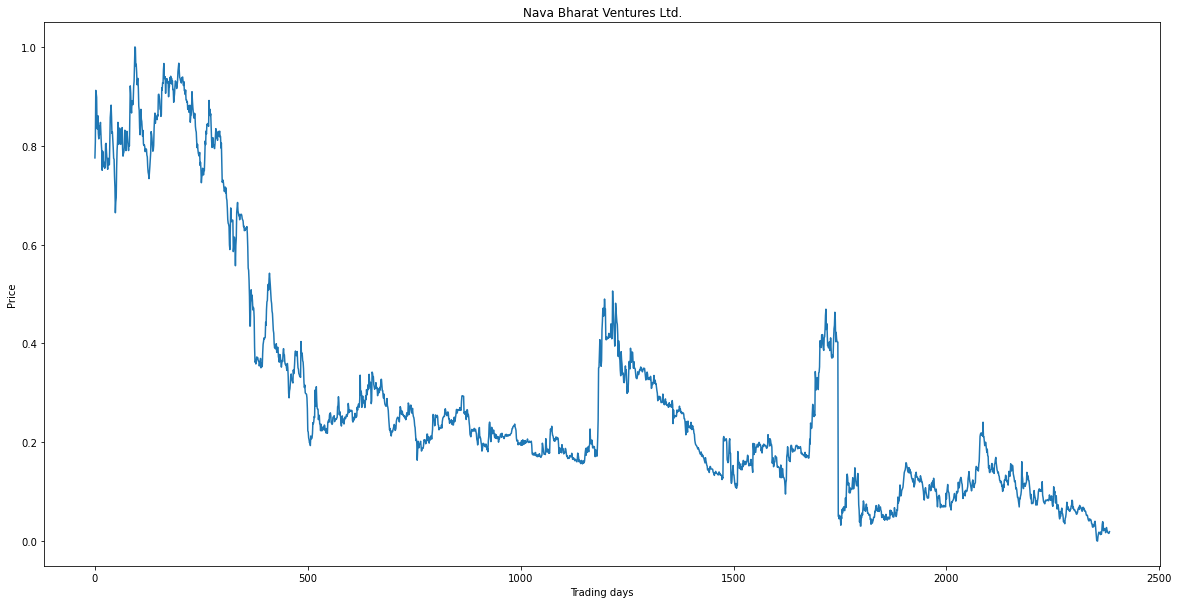

In [2]:
from sklearn.preprocessing import MinMaxScaler

def get_normalised_data(data):
    scaler = MinMaxScaler()
    numerical = ['Open','High','Low','Close','Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

stocks = get_normalised_data(stocks)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Nava Bharat Ventures Ltd.")
plt.show()

In [3]:
import math
from IPython.display import display
import time
from keras.layers.core import Dense,Dropout,Activation
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN

#UNROLL_FUNCTION
def unroll(stocks,unroll_length):
    result = []
    for i in range(len(stocks)-unroll_length+1):
        result.append(stocks[i : (i+unroll_length)])
    return np.asarray(result)

#SIMPLERNN_MODEL
def build_model(input_dim,output_dim,return_sequences):
    model = Sequential()
    model.add(SimpleRNN(input_shape = (None,input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 100, return_sequences = False))
    model.add(Dense(units = 100))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model

#LSTM_MODEL
def build_lstm_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(input_shape = (None, input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(LSTM(units = 128, return_sequences = False))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


#GRU_MODEL
def build_gru_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(GRU(input_shape = (None,input_dim), units = output_dim, return_sequences=return_sequences))
    #model.add(Dropout(0.2))
    model.add(GRU(units=128,return_sequences = False))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


def plot_prediction(actual, prediction, title='NBVENTURES TRADING VS PREDICTIONS', y_label='Price INR', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()


#RESULT_STAT_FUNCTION
def err_stat(y_test,preds):
    Error = preds - y_test
    print("Standard Deviation of Error : ", np.std(Error))
    stdErr = np.std(Error)
    DstdErr = stdErr * (np.max(df['Close']) - np.min(df['Close']))
    print("Denormalised Standard Deviation : ", DstdErr)
    print("Ratio of Standard Deviation of Error to Standard Deviation of Stock Price : ", DstdErr/np.std(df['Close']))




#####
#TRAIN_TEST_SPLIT
stocks = stocks.drop(['Date','Day'], axis =1)
stocks.head()

def train_test_split(stocks,unroll_length,prediction_size,prediction_time):
    x_test_start = prediction_size + prediction_time + unroll_length - 1
    
    #train data
    x_train = stocks[0 : (-x_test_start - prediction_time)].to_numpy()
    y_train = stocks[ (unroll_length - 1 + prediction_time) : -x_test_start]['Close'].to_numpy()
    
    #test_data
    x_test = stocks[-x_test_start : -prediction_time].to_numpy()
    y_test = stocks[-prediction_size:]['Close'].to_numpy()

    
    return x_train,x_test,y_train,y_test

prediction_size = 248
prediction_time = 5
unroll_length = 50

x_train,x_test,y_train,y_test = train_test_split(stocks,unroll_length,prediction_size,prediction_time)

x_train = unroll(x_train,unroll_length)
x_test = unroll(x_test,unroll_length)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#####



x_train (2028, 50, 5)
y_train (2028,)
x_test (248, 50, 5)
y_test (248,)


Epoch 1/50
61/61 [==============================] - 2s 20ms/step - loss: 0.2229 - val_loss: 0.0075
Epoch 2/50
61/61 [==============================] - 1s 16ms/step - loss: 0.0064 - val_loss: 0.0044
Epoch 3/50
61/61 [==============================] - 1s 14ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 4/50
61/61 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0052
Epoch 5/50
61/61 [==============================] - 1s 13ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 6/50
61/61 [==============================] - 1s 13ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 7/50
61/61 [==============================] - 1s 13ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 8/50
61/61 [==============================] - 1s 13ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 9/50
61/61 [==============================] - 1s 13ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 10/50
61/61 [==============================] - 1s 13ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 11/

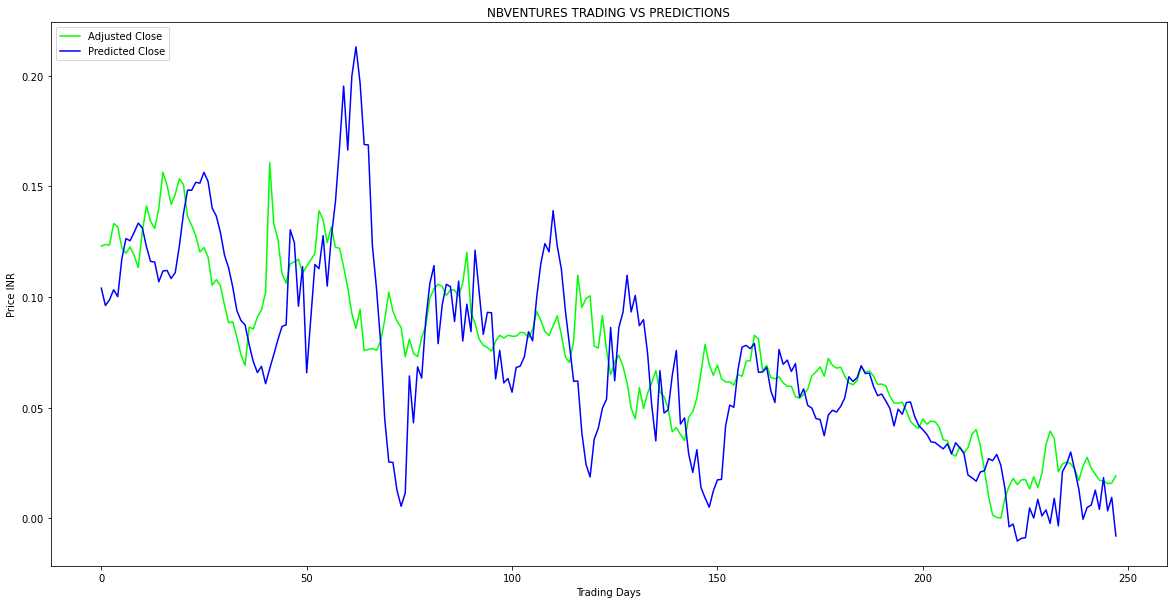

Standard Deviation of Error :  0.0575766983425649
Denormalised Standard Deviation :  20.33033218475967
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  0.23791232568408302


In [4]:
#TRAIN_SIMPLE_RNN_MODEL
model = build_model(input_dim = x_train.shape[-1], output_dim = unroll_length, return_sequences=True)
model.compile(loss = "mean_squared_error", optimizer = 'Adam')
model.fit(x_train, y_train, epochs =50, validation_split = 0.05)

#PRINT_RESULT
trainScore = model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

preds = model.predict(x_test)
plot_prediction(y_test, preds)
err_stat(y_test,preds)

Epoch 1/50
61/61 [==============================] - 6s 67ms/step - loss: 0.0288 - val_loss: 7.4183e-04
Epoch 2/50
61/61 [==============================] - 2s 37ms/step - loss: 0.0023 - val_loss: 6.6460e-04
Epoch 3/50
61/61 [==============================] - 2s 36ms/step - loss: 0.0022 - val_loss: 7.1815e-04
Epoch 4/50
61/61 [==============================] - 2s 41ms/step - loss: 0.0022 - val_loss: 5.8833e-04
Epoch 5/50
61/61 [==============================] - 3s 44ms/step - loss: 0.0020 - val_loss: 5.9876e-04
Epoch 6/50
61/61 [==============================] - 3s 42ms/step - loss: 0.0018 - val_loss: 5.7339e-04
Epoch 7/50
61/61 [==============================] - 2s 38ms/step - loss: 0.0016 - val_loss: 6.2338e-04
Epoch 8/50
61/61 [==============================] - 2s 37ms/step - loss: 0.0015 - val_loss: 5.8671e-04
Epoch 9/50
61/61 [==============================] - 2s 39ms/step - loss: 0.0018 - val_loss: 8.8357e-04
Epoch 10/50
61/61 [==============================] - 2s 39ms/step - loss:

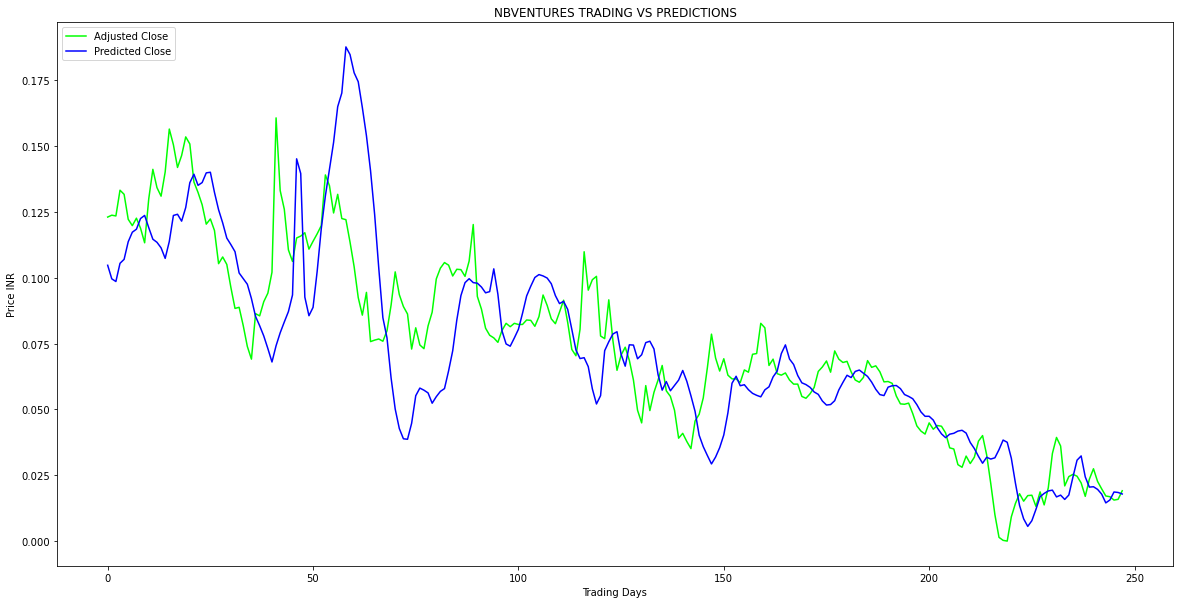

Standard Deviation of Error :  0.0517040439062481
Denormalised Standard Deviation :  18.256697903296207
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  0.21364596593955104


In [5]:
#TRAIN_LSTM_MODEL
lstm_model = build_lstm_model(x_train.shape[-1], unroll_length, return_sequences = True)
lstm_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
lstm_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

trainScore = lstm_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
preds_lstm = lstm_model.predict(x_test)
plot_prediction(y_test, preds_lstm)
err_stat(y_test,preds_lstm)

Epoch 1/50
61/61 [==============================] - 5s 52ms/step - loss: 0.0364 - val_loss: 5.6761e-04
Epoch 2/50
61/61 [==============================] - 2s 41ms/step - loss: 0.0016 - val_loss: 5.2055e-04
Epoch 3/50
61/61 [==============================] - 3s 47ms/step - loss: 0.0018 - val_loss: 5.9397e-04
Epoch 4/50
61/61 [==============================] - 2s 37ms/step - loss: 0.0018 - val_loss: 4.7833e-04
Epoch 5/50
61/61 [==============================] - 2s 32ms/step - loss: 0.0017 - val_loss: 4.8074e-04
Epoch 6/50
61/61 [==============================] - 2s 34ms/step - loss: 0.0014 - val_loss: 4.9618e-04
Epoch 7/50
61/61 [==============================] - 2s 35ms/step - loss: 0.0015 - val_loss: 6.5259e-04
Epoch 8/50
61/61 [==============================] - 2s 38ms/step - loss: 0.0013 - val_loss: 4.7675e-04
Epoch 9/50
61/61 [==============================] - 2s 36ms/step - loss: 0.0016 - val_loss: 5.2327e-04
Epoch 10/50
61/61 [==============================] - 2s 35ms/step - loss:

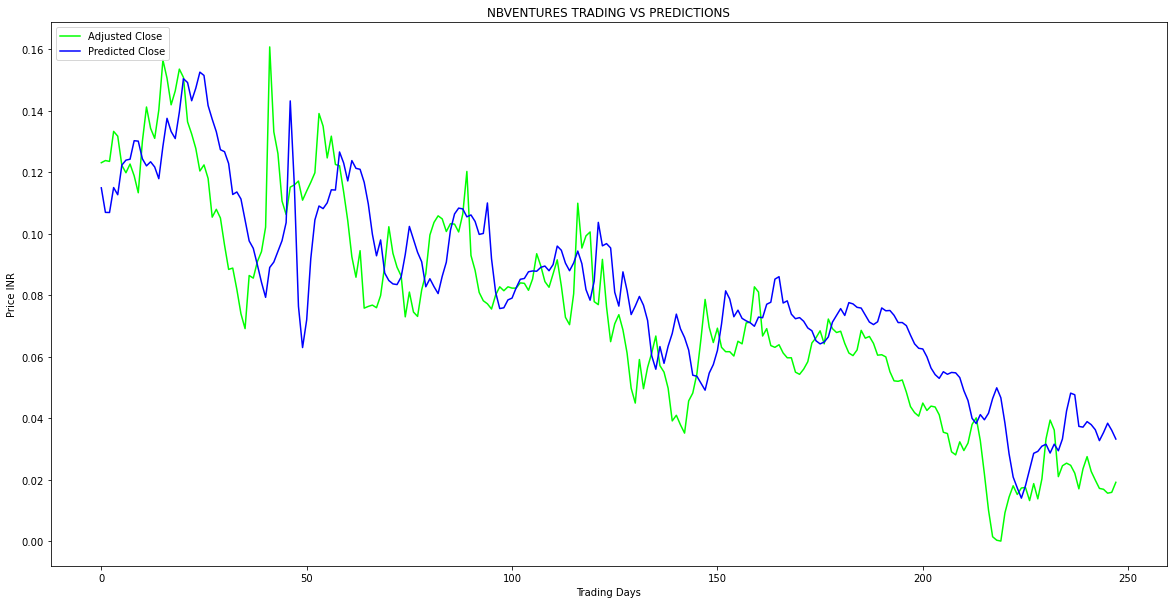

Standard Deviation of Error :  0.046550076367802985
Denormalised Standard Deviation :  16.436831965471235
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  0.19234928796270262


In [7]:
#TRAIN_GRU_MODEL
gru_model = build_gru_model(x_train.shape[-1], unroll_length, return_sequences = True)
gru_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
gru_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

trainScore = gru_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = gru_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))
preds_gru = gru_model.predict(x_test)
plot_prediction(y_test, preds_gru)
err_stat(y_test,preds_gru)